In [2]:
# Step 2: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [13]:
# Data Preprocessing

# Step 2: Load the Mathematics Dataset
# This dataset examines student achievement of two Portugese schools in the subject of mathematics
file = "student-mat.csv"  
df = pd.read_csv(file, sep=";") 

# Step 3: Convert numeric columns
num_columns = ["age", "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime","goout", "Dalc", "Walc", "health", "absences", "G1", "G2", "G3"]

df[num_columns] = df[num_columns].apply(pd.to_numeric, errors='coerce')

# Step 4: There are no missing values in our Dataset

# Step 5: Display the data with a title
print("Student Data")
df

Student Data


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


**Correlation Analysis**
We will be examining the relationship between G1 and G2 Grades to the final G3 grades.
We hypothesize that high G1 and G2 grades are good predictors of a higher G3 grade.
To accomodate for both periods, we will create two hypothesis pairs.

Null Hypothesis 1: G1 grades do not correlate to higher G3 grades
Alternative Hypothesis 1: G1 grades are positively correlated to G3 grades
Null Hypothesis 2: G2 grades do not correlate to higher G3 grades
Alternative Hypothesis 2: G2 grades are positively correlated to G3 grades

We will be computing the correlation value using the Pearson correlation coefficient and comparing the p-value to a significance value of 0.05.


G1 vs. G3 Pearson Correlation: 0.8014679320174142
G1 vs. G3 P-Value: 9.001430312276764e-90
We Reject Null Hypothesis 1 (P-Value < 0.05): True

G2 vs. G3 Pearson Correlation: 0.9048679892693011
G2 vs. G3 P-Value: 7.625719154047869e-148
We Reject Null Hypothesis 2 (P-Value < 0.05): True



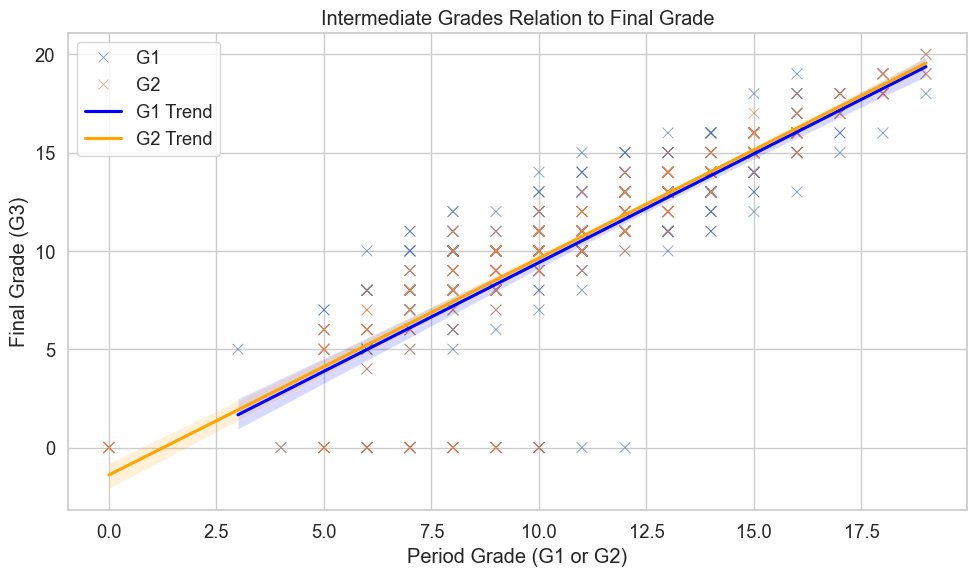

In [ ]:
sig_val = 0.05

# Calculate Pearson correlation and p-value for G1 vs G3
g1_corr, g1_pval = pearsonr(df["G1"], df["G3"])

# Calculate Pearson correlation and p-value for G2 vs G3
g2_corr, g2_pval = pearsonr(df["G2"], df["G3"])

print(f"""
G1 vs. G3 Pearson Correlation: {g1_corr}
G1 vs. G3 P-Value: {g1_pval}
We Reject Null Hypothesis 1 (P-Value < {sig_val}): {g1_pval < sig_val}

G2 vs. G3 Pearson Correlation: {g2_corr}
G2 vs. G3 P-Value: {g2_pval}
We Reject Null Hypothesis 2 (P-Value < {sig_val}): {g2_pval < sig_val}
""")

# We create the scatter plot comparing G1 and G2 to G3

#We melt G1 and G2 together to display both on the same axis
df_long = pd.melt(df, id_vars=["G3"], value_vars=["G1", "G2"],
                  var_name="Period", value_name="Grade")

# Create a scatter plot with regression lines for both G1 and G2 vs G3
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_long,
    x="Grade",
    y="G3",
    hue="Period",
    alpha=0.7,
    s=60,
    marker="x"
)
sns.regplot(data=df[df["G1"].notnull()], x="G1", y="G3", scatter=False, label="G1 Trend", color="blue")
sns.regplot(data=df[df["G2"].notnull()], x="G2", y="G3", scatter=False, label="G2 Trend", color="orange")

plt.title("Intermediate Grades Relation to Final Grade")
plt.xlabel("Period Grade (G1 or G2)")
plt.ylabel("Final Grade (G3)")
plt.legend()
plt.tight_layout()
plt.show()
